In [2]:
# Basic Libraries
import pandas as pd
import numpy as np

# Text Preprocessing
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Machine Learning Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Optional: Word Cloud Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [3]:
# Load CSV (assume uploaded as 'spam.csv')
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]  # Keep only label and message
df.columns = ['label', 'message']

# Check the first few rows
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Convert label to numeric
df['label_num'] = df['label'].map({'ham':0, 'spam':1})

# Text cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\W', ' ', text)  # Remove punctuation/special chars
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

df['clean_message'] = df['message'].apply(clean_text)


In [5]:
X = df['clean_message']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [7]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.97847533632287
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [8]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9641255605381166
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.75      0.85       150

    accuracy                           0.96      1115
   macro avg       0.97      0.88      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [9]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.97847533632287
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [11]:
!pip install wordcloud matplotlib


In [12]:
# Join spam messages
spam_words = ' '.join(df[df['label']=='spam']['clean_message'].astype(str))

# Join ham messages
ham_words = ' '.join(df[df['label']=='ham']['clean_message'].astype(str))


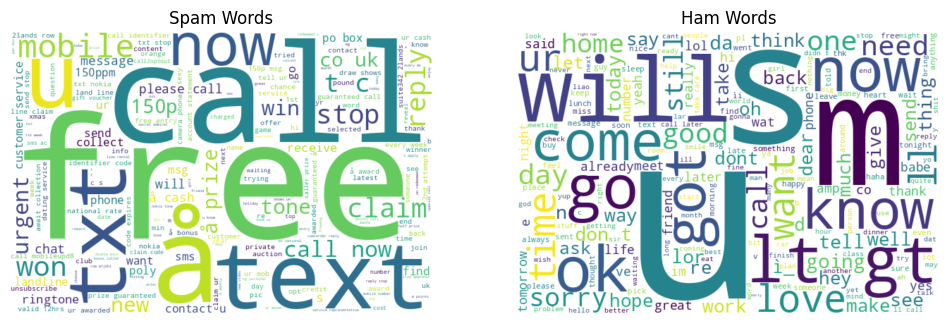

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Spam WordCloud
plt.subplot(1,2,1)
spam_wc = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Spam Words')
plt.axis('off')

# Ham WordCloud
plt.subplot(1,2,2)
ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Ham Words')
plt.axis('off')

plt.show()
